In [1]:
import pandas as pd
import numpy as np

# Load your file
df = pd.read_csv("C:/Users/Admin/Downloads/supply_chain_ecommerce_10000.csv")

df.info()
df.head()
df.describe(include='all')
print("\n✅ Data Imported")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         10000 non-null  object 
 1   Order_Date       10000 non-null  object 
 2   Delivery_Date    10000 non-null  object 
 3   Product          10000 non-null  object 
 4   Category         10000 non-null  object 
 5   Supplier         10000 non-null  object 
 6   Region           10000 non-null  object 
 7   Quantity         10000 non-null  int64  
 8   Unit_Price       10000 non-null  float64
 9   Total_Cost       10000 non-null  float64
 10  Shipping_Cost    10000 non-null  float64
 11  Promised_Days    10000 non-null  int64  
 12  Delivery_Days    10000 non-null  int64  
 13  Delivery_Status  10000 non-null  object 
 14  Customer_Rating  10000 non-null  float64
dtypes: float64(4), int64(3), object(8)
memory usage: 1.1+ MB

✅ Data Imported


In [2]:
# Convert dates
df["Order_Date"] = pd.to_datetime(df["Order_Date"], errors="coerce")
df["Delivery_Date"] = pd.to_datetime(df["Delivery_Date"], errors="coerce")

# Fix missing Order_Date with mode
df["Order_Date"] = df["Order_Date"].fillna(df["Order_Date"].mode()[0])

# Fix missing Delivery_Date using Order_Date + Delivery_Days
df["Delivery_Date"] = df["Delivery_Date"].fillna(
    df["Order_Date"] + pd.to_timedelta(df["Delivery_Days"], unit="D"))

#  FIX NEGATIVE OR ZERO VALUES
df.loc[df["Quantity"] <= 0, "Quantity"] = df["Quantity"].median()
df.loc[df["Unit_Price"] <= 0, "Unit_Price"] = df["Unit_Price"].median()
df.loc[df["Total_Cost"] <= 0, "Total_Cost"] = np.nan  # temporary, fix later
df.loc[df["Shipping_Cost"] < 0, "Shipping_Cost"] = df["Shipping_Cost"].abs()

#  FIX CUSTOMER RATING (clip 0–5)
df["Customer_Rating"] = df["Customer_Rating"].clip(0, 5)

#  FIX TOTAL COST INCONSISTENCY
df["Expected_Cost"] = df["Quantity"] * df["Unit_Price"]

# Replace wrong or missing Total_Cost
df["Total_Cost"] = df["Total_Cost"].fillna(df["Expected_Cost"])
df.loc[np.abs(df["Total_Cost"] - df["Expected_Cost"]) > 1, "Total_Cost"] = df["Expected_Cost"]

# Remove helper column
df = df.drop(columns=["Expected_Cost"])

#  FIX DELIVERY_DAYS BASED ON DATES
df["Delivery_Days"] = (df["Delivery_Date"] - df["Order_Date"]).dt.days

# Cap extreme values (>60 days)
median_days = df["Delivery_Days"].median()
df.loc[df["Delivery_Days"] < 0, "Delivery_Days"] = median_days
df.loc[df["Delivery_Days"] > 60, "Delivery_Days"] = median_days

#  FIX DELIVERY STATUS
df.loc[df["Delivery_Days"] > 0, "Delivery_Status"] = "Delivered"
df.loc[df["Delivery_Days"] <= 0, "Delivery_Status"] = "Pending"

#  FINAL CHECK (OPTIONAL)
print(df.info())
print(df.head())


# SAVE CLEANED FILE
df.to_csv("C:/Users/Admin/Downloads/cleaned_orders.csv", index=False)


C:\Users\Admin\AppData\Local\Temp\ipykernel_10824\3350556928.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Order_Date"] = pd.to_datetime(df["Order_Date"], errors="coerce")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order_ID         10000 non-null  object        
 1   Order_Date       10000 non-null  datetime64[ns]
 2   Delivery_Date    10000 non-null  datetime64[ns]
 3   Product          10000 non-null  object        
 4   Category         10000 non-null  object        
 5   Supplier         10000 non-null  object        
 6   Region           10000 non-null  object        
 7   Quantity         10000 non-null  int64         
 8   Unit_Price       10000 non-null  float64       
 9   Total_Cost       10000 non-null  float64       
 10  Shipping_Cost    10000 non-null  float64       
 11  Promised_Days    10000 non-null  int64         
 12  Delivery_Days    10000 non-null  int64         
 13  Delivery_Status  10000 non-null  object        
 14  Customer_Rating  10000 non-null  float6


===== BASIC INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         10000 non-null  object 
 1   Order_Date       10000 non-null  object 
 2   Delivery_Date    10000 non-null  object 
 3   Product          10000 non-null  object 
 4   Category         10000 non-null  object 
 5   Supplier         10000 non-null  object 
 6   Region           10000 non-null  object 
 7   Quantity         10000 non-null  int64  
 8   Unit_Price       10000 non-null  float64
 9   Total_Cost       10000 non-null  float64
 10  Shipping_Cost    10000 non-null  float64
 11  Promised_Days    10000 non-null  int64  
 12  Delivery_Days    10000 non-null  int64  
 13  Delivery_Status  10000 non-null  object 
 14  Customer_Rating  10000 non-null  float64
dtypes: float64(4), int64(3), object(8)
memory usage: 1.1+ MB
None

===== FIRST 5 ROWS

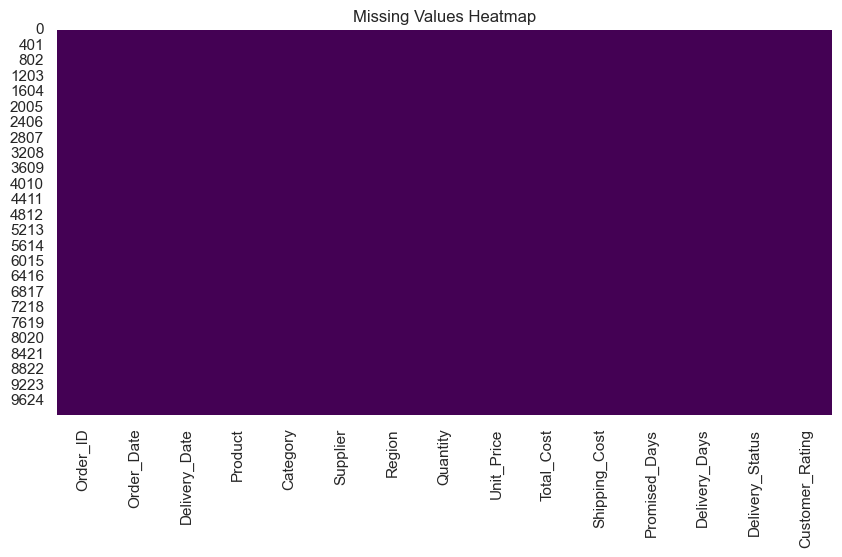

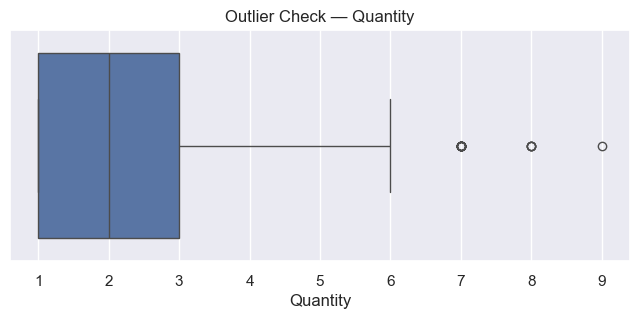

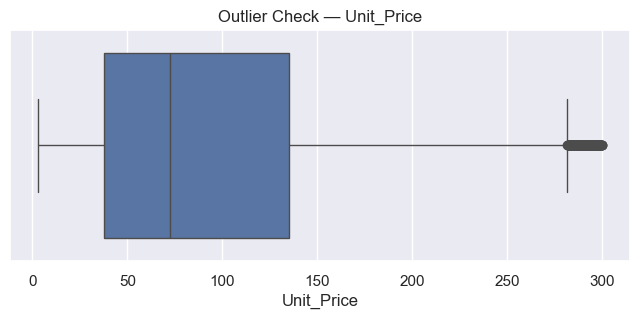

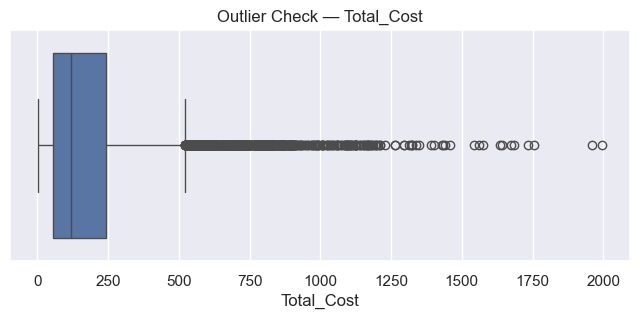

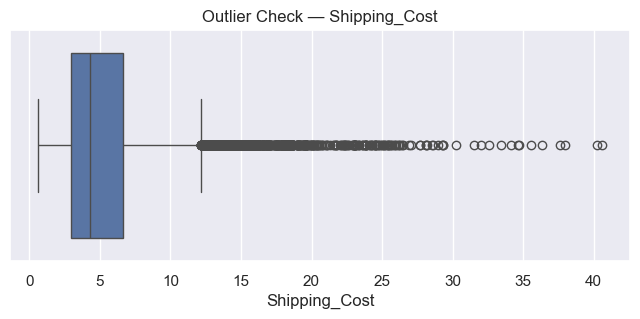

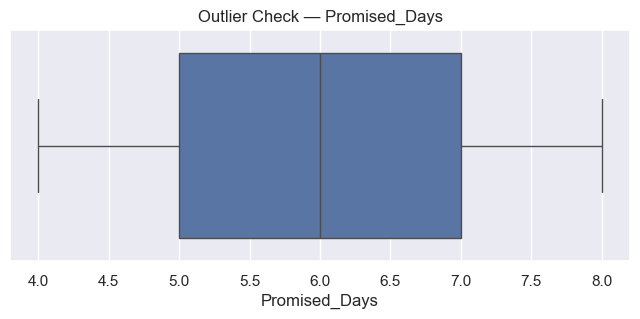

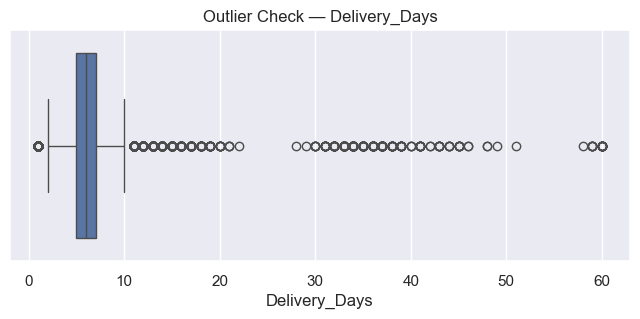

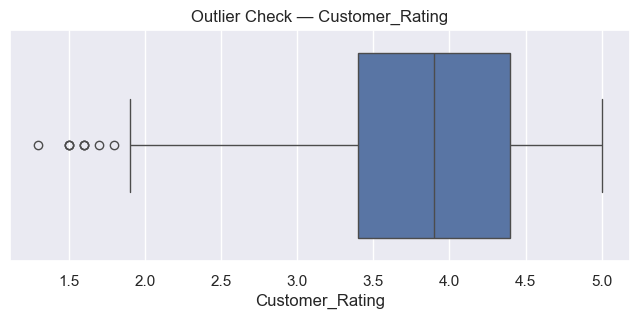

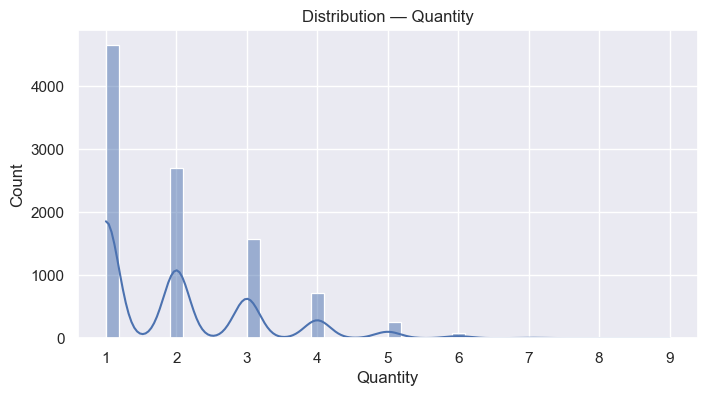

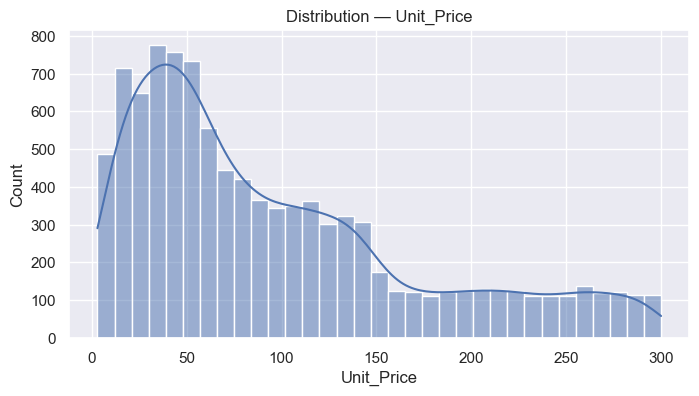

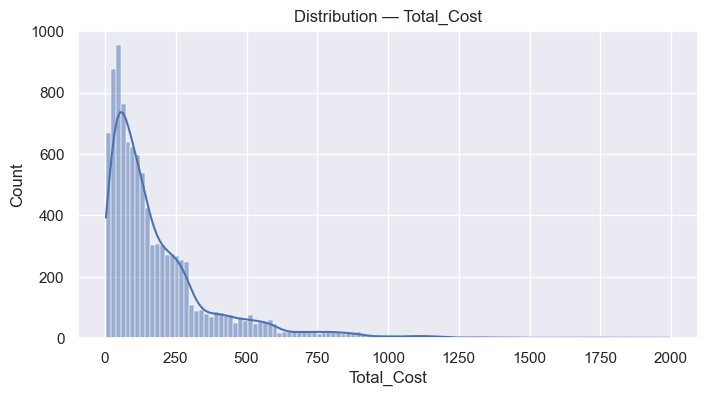

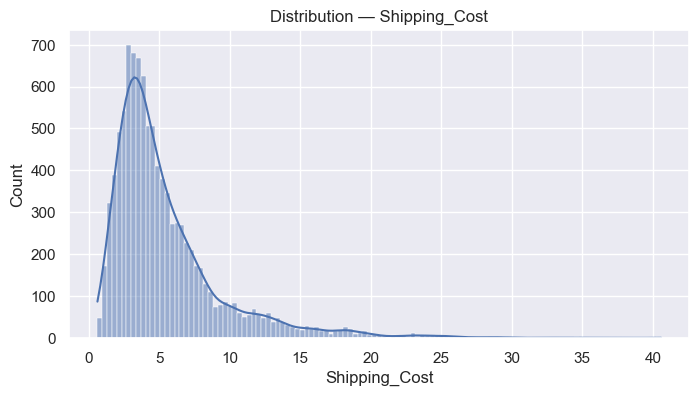

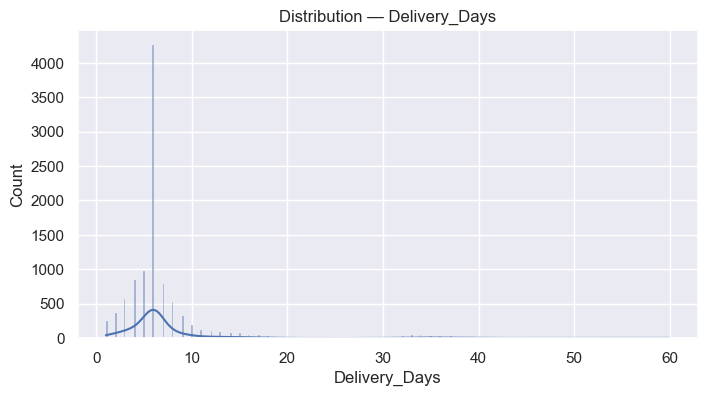

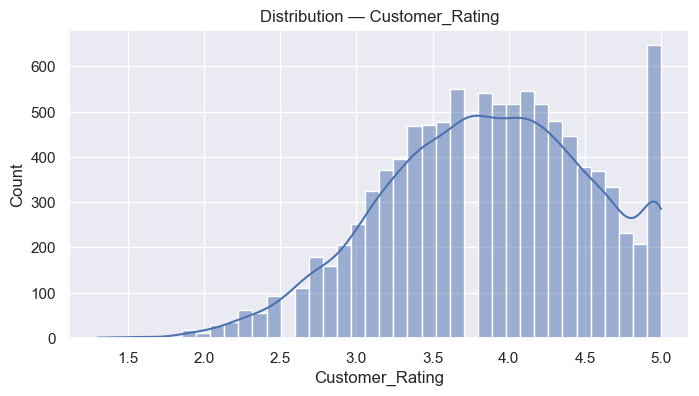

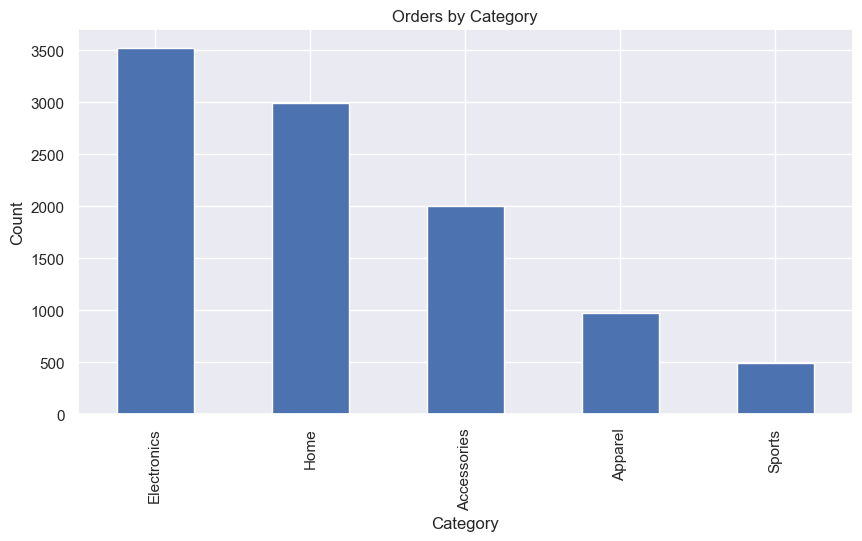

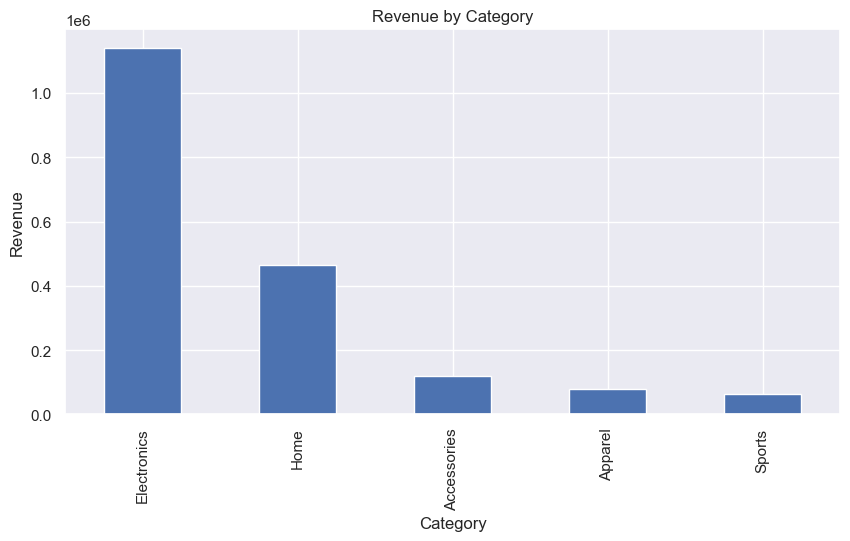


===== SUPPLIER PERFORMANCE =====
             Delivery_Days  Customer_Rating  Total_Cost  Shipping_Cost
Supplier                                                              
Supplier_17       6.577640         3.871739    58860.58       5.407112
Supplier_01       6.623932         3.855556    65228.39       5.487664
Supplier_13       6.787975         3.885759    57419.85       5.389430
Supplier_07       6.828488         3.787209    60900.04       5.286802
Supplier_21       6.854985         3.931118    60971.46       5.410453
Supplier_19       6.855422         3.862952    65986.01       5.704006
Supplier_02       6.859477         3.872876    54087.35       5.363954
Supplier_26       6.877023         3.806796    54714.53       5.347735
Supplier_12       6.906977         3.855814    64663.72       5.513488
Supplier_16       6.914773         3.876136    63283.76       5.359489
Supplier_03       6.935933         3.899721    65918.57       5.509721
Supplier_10       7.008646         3.897118

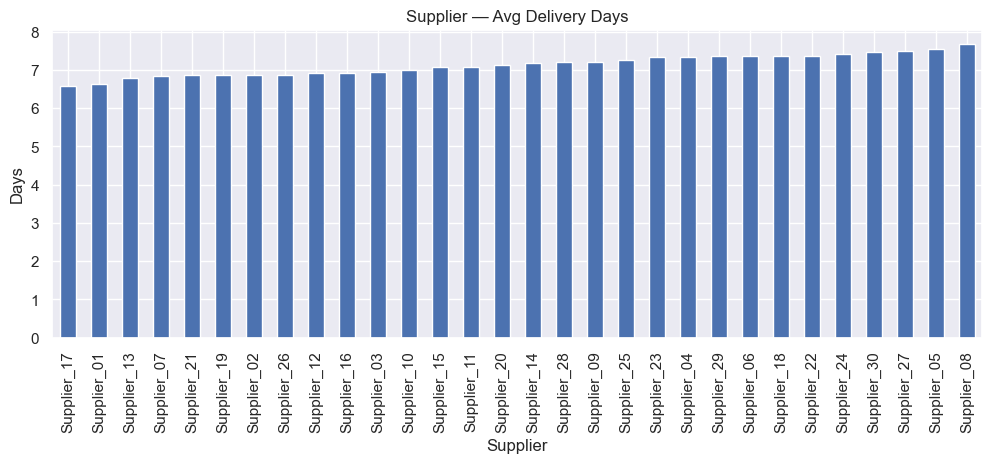

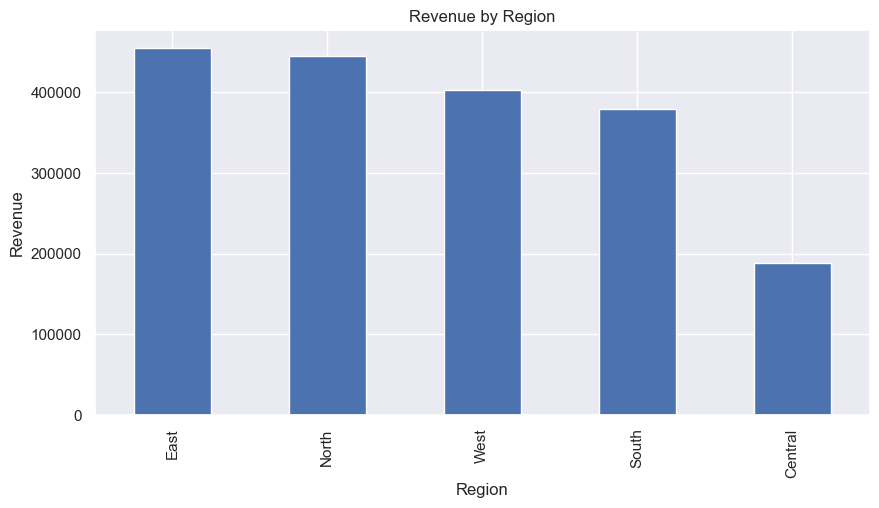


===== OVERALL ON-TIME DELIVERY RATE: 58.55% =====


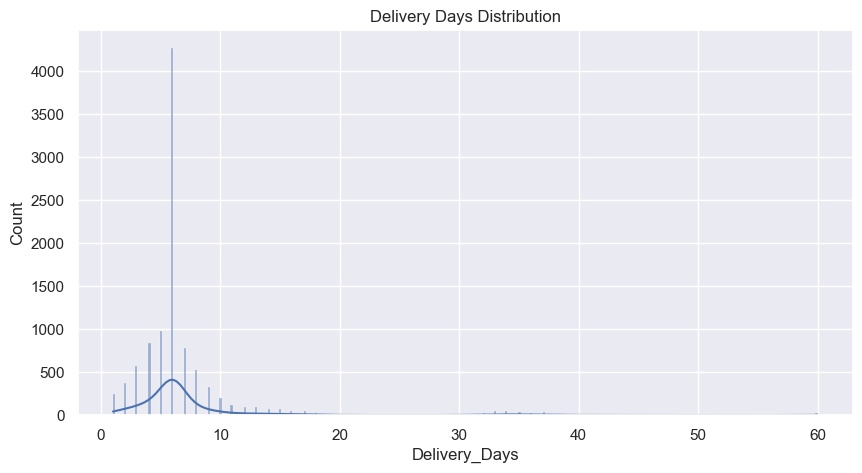

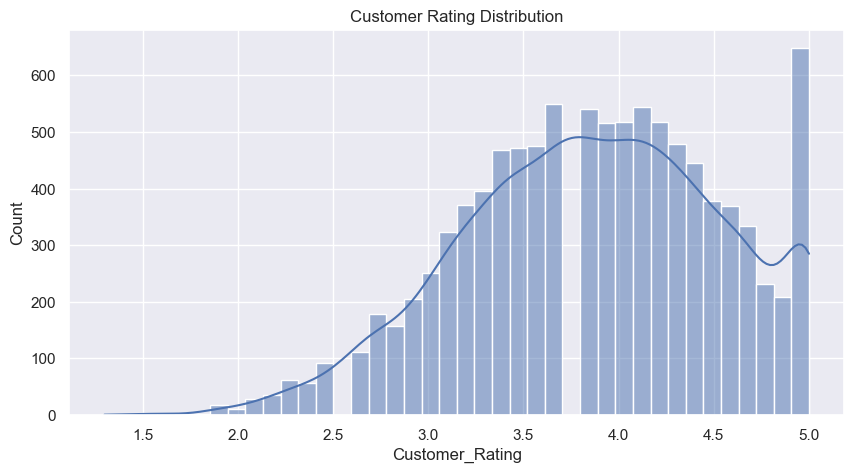

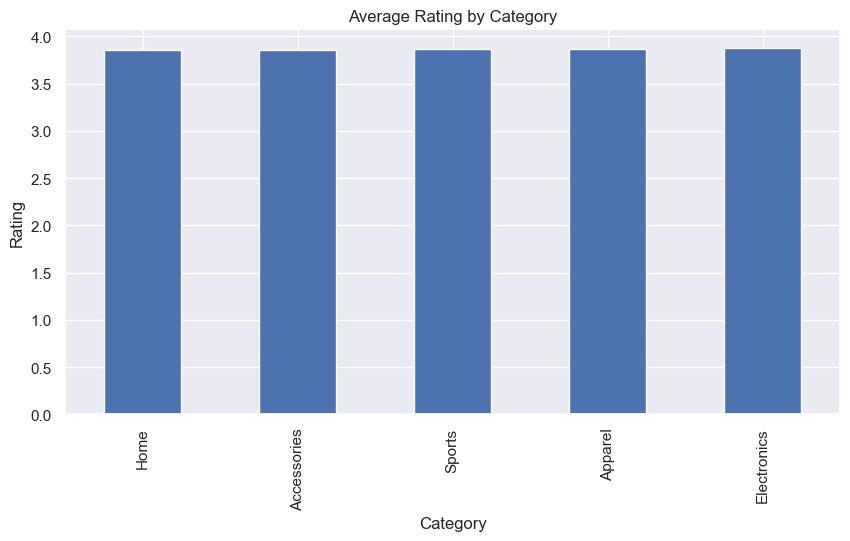

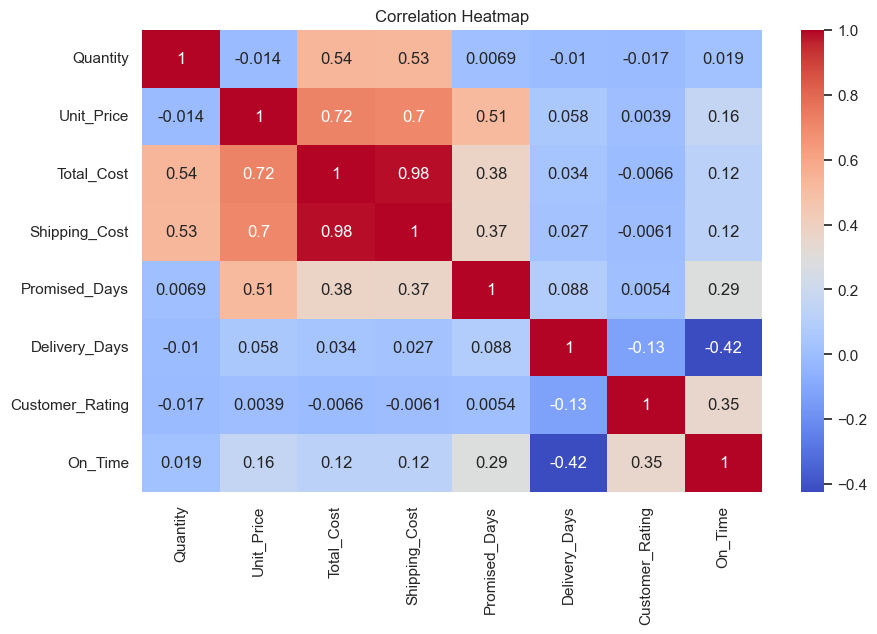

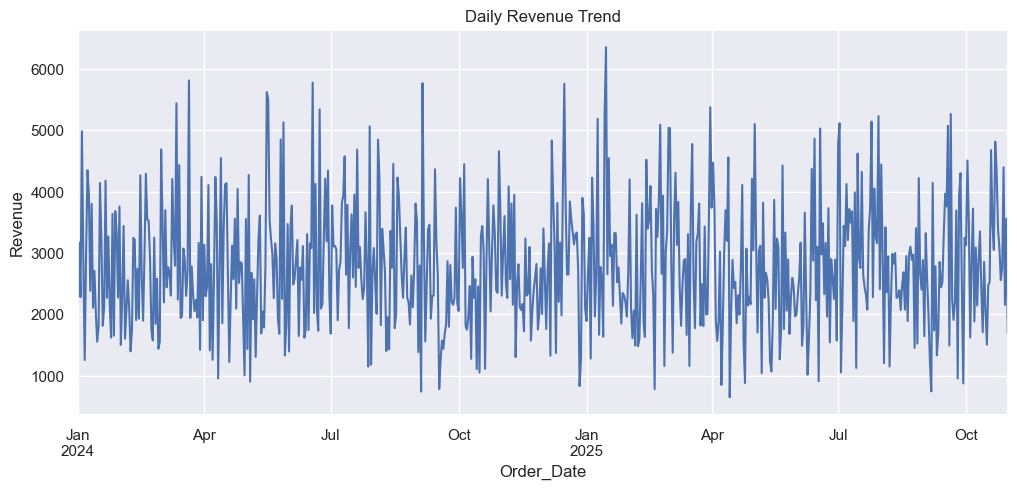

In [3]:
 #FULL EDA FOR ORDER DATA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Clean visuals
plt.style.use("default")
sns.set(rc={"figure.figsize": (10,5)})

# 1) LOAD & PREVIEW DATA
df = pd.read_csv("C:/Users/Admin/Downloads/cleaned_orders.csv")

print("\n===== BASIC INFO =====")
print(df.info())

print("\n===== FIRST 5 ROWS =====")
print(df.head())

print("\n===== SUMMARY STATISTICS =====")
print(df.describe(include='all'))

# 2) CHECK DATA TYPES
print("\n===== DATA TYPES =====")
print(df.dtypes)

# Convert to datetime (safe)
df["Order_Date"] = pd.to_datetime(df["Order_Date"], errors="coerce")
df["Delivery_Date"] = pd.to_datetime(df["Delivery_Date"], errors="coerce")

# 3) MISSING VALUE ANALYSIS
print("\n===== MISSING VALUES =====")
print(df.isna().sum())

# Heatmap of missing values
sns.heatmap(df.isna(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

# 4) OUTLIER DETECTION (NUMERIC)
numeric_cols = df.select_dtypes(include=['float64','int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8,3))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Check — {col}")
    plt.show()

# 5) DISTRIBUTIONS
dist_cols = ["Quantity", "Unit_Price", "Total_Cost", "Shipping_Cost", "Delivery_Days", "Customer_Rating"]

for col in dist_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution — {col}")
    plt.show()

# 6) CATEGORY ANALYSIS
plt.figure(figsize=(10,5))
df["Category"].value_counts().plot(kind="bar")
plt.title("Orders by Category")
plt.ylabel("Count")
plt.show()

# Revenue by category
cat_rev = df.groupby("Category")["Total_Cost"].sum().sort_values(ascending=False)
cat_rev.plot(kind="bar", figsize=(10,5))
plt.title("Revenue by Category")
plt.ylabel("Revenue")
plt.show()

# 7) SUPPLIER PERFORMANCE
supplier_perf = df.groupby("Supplier").agg({
    "Delivery_Days": "mean",
    "Customer_Rating": "mean",
    "Total_Cost": "sum",
    "Shipping_Cost": "mean"
}).sort_values("Delivery_Days")

print("\n===== SUPPLIER PERFORMANCE =====")
print(supplier_perf)

supplier_perf["Delivery_Days"].plot(kind="bar", figsize=(12,4))
plt.title("Supplier — Avg Delivery Days")
plt.ylabel("Days")
plt.show()

# 8) REGION ANALYSIS
region_rev = df.groupby("Region")["Total_Cost"].sum().sort_values(ascending=False)

region_rev.plot(kind="bar", figsize=(10,5))
plt.title("Revenue by Region")
plt.ylabel("Revenue")
plt.show()

# 9) DELIVERY PERFORMANCE
df["On_Time"] = (df["Delivery_Days"] <= df["Promised_Days"]).astype(int)
on_time_rate = df["On_Time"].mean()

print(f"\n===== OVERALL ON-TIME DELIVERY RATE: {on_time_rate:.2%} =====")

sns.histplot(df["Delivery_Days"], kde=True)
plt.title("Delivery Days Distribution")
plt.show()

# 1O) CUSTOMER RATING ANALYSIS
sns.histplot(df["Customer_Rating"], kde=True)
plt.title("Customer Rating Distribution")
plt.show()

rating_by_cat = df.groupby("Category")["Customer_Rating"].mean().sort_values()

rating_by_cat.plot(kind="bar", figsize=(10,5))
plt.title("Average Rating by Category")
plt.ylabel("Rating")
plt.show()

# 11) CORRELATION ANALYSIS
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 12) TIME SERIES ANALYSIS
daily_rev = df.groupby("Order_Date")["Total_Cost"].sum()

daily_rev.plot(figsize=(12,5))
plt.title("Daily Revenue Trend")
plt.ylabel("Revenue")
plt.show()

# EXPORT CLEANED/EDA VERSION (OPTIONAL)
df.to_csv("C:/Users/Admin/Downloads/EDA_ready_file.csv", index=False)



In [31]:
import pandas as pd

from sqlalchemy import create_engine
df = pd.read_csv("C:/Users/Admin/Downloads/cleaned_orders.csv")
df.head()

,Order_ID,Order_Date,Delivery_Date,Product,Category,Supplier,Region,Quantity,Unit_Price,Total_Cost,Shipping_Cost,Promised_Days,Delivery_Days,Delivery_Status,Customer_Rating
0,ORD100000,2025-09-28,2025-04-10,Running Shoes,Apparel,Supplier_01,South,1,9.36,9.36,2.85,5,6,Delivered,4.3
1,ORD100001,2025-04-19,2025-04-22,T-shirt,Apparel,Supplier_08,East,1,44.36,44.36,2.47,4,3,Delivered,4.5
2,ORD100002,2025-02-13,2025-02-19,Bluetooth Speaker,Electronics,Supplier_05,South,2,168.84,337.68,8.73,7,6,Delivered,3.8
3,ORD100003,2025-02-11,2025-02-19,Running Shoes,Apparel,Supplier_22,North,1,50.75,50.75,3.60,4,8,Delivered,4.0
4,ORD100004,2024-09-19,2024-09-25,Office Chair,Home,Supplier_03,North,1,14.38,14.38,2.89,5,6,Delivered,3.0


In [37]:
engine = create_engine("sqlite:///orders.db")
df.to_sql("orders", engine, index=False, if_exists="replace")


10000

In [38]:
query = """
SELECT COUNT(*) AS total_orders
FROM orders;
"""
run_sql(query)


,total_orders
0,10000


In [59]:
query = """
SELECT 
    strftime('%Y-%m', Order_Date) AS month,
    SUM(Quantity * Unit_Price) AS total_revenue
FROM orders
GROUP BY month
ORDER BY month;
"""

monthly_revenue = run_sql(query)
monthly_revenue

,month,total_revenue
0,2024-01,87575.37
1,2024-02,71756.74
2,2024-03,91322.94
3,2024-04,82292.34
4,2024-05,87846.94
5,2024-06,87178.73
6,2024-07,92790.69
7,2024-08,87087.30
8,2024-09,73683.32
9,2024-10,85016.61


In [61]:
query = """
SELECT 
    Region,
    SUM(Quantity * Unit_Price) AS total_revenue
FROM orders
GROUP BY Region
ORDER BY total_revenue DESC
LIMIT 1;
"""
best_region = run_sql(query)
best_region


,Region,total_revenue
0,East,454357.85


In [62]:
query = """
SELECT 
    Supplier,
    AVG(Delivery_Days) AS avg_delivery_days
FROM orders
GROUP BY Supplier
ORDER BY avg_delivery_days ASC
LIMIT 5;
"""
fastest_suppliers = run_sql(query)
fastest_suppliers


,Supplier,avg_delivery_days
0,Supplier_17,6.577640
1,Supplier_01,6.623932
2,Supplier_13,6.787975
3,Supplier_07,6.828488
4,Supplier_21,6.854985


In [63]:
query = """
SELECT 
    Supplier,
    AVG(Delivery_Days) AS avg_delivery_days
FROM orders
GROUP BY Supplier
ORDER BY avg_delivery_days DESC
LIMIT 5;
"""
slowest_suppliers = run_sql(query)
slowest_suppliers


,Supplier,avg_delivery_days
0,Supplier_08,7.674342
1,Supplier_05,7.552239
2,Supplier_27,7.492063
3,Supplier_30,7.466667
4,Supplier_24,7.416910


In [64]:
query = """
SELECT 
    ROUND(
        SUM(CASE WHEN Delivery_Status = 'Cancelled' THEN 1 ELSE 0 END) * 100.0 
        / COUNT(*), 2
    ) AS cancellation_rate_pct
FROM orders;
"""
cancellation_rate = run_sql(query)
cancellation_rate


,cancellation_rate_pct
0,0.0


In [65]:
query = """
SELECT 
    ROUND(
        SUM(CASE WHEN Delivery_Days <= Promised_Days THEN 1 ELSE 0 END) * 100.0 
        / COUNT(*), 2
    ) AS on_time_delivery_rate_pct
FROM orders;
"""
otd = run_sql(query)
otd


,on_time_delivery_rate_pct
0,58.55


In [66]:
query = """
SELECT 
    Product,
    SUM(Quantity) AS total_quantity_sold
FROM orders
GROUP BY Product
ORDER BY total_quantity_sold DESC;
"""
most_sold_products = run_sql(query)
most_sold_products


,Product,total_quantity_sold
0,Gaming Mouse,1098
1,LED Monitor,1030
2,Bluetooth Speaker,1026
3,Office Chair,1012
4,Sunglasses,1010
5,Backpack,1007
6,Fitness Tracker,1006
7,Cookware Set,991
8,Travel Adapter,984
9,Yoga Mat,980


In [67]:
query = """
SELECT 
    AVG(Delivery_Days) AS avg_delivery_days
FROM orders;
"""
avg_delivery_days = run_sql(query)
avg_delivery_days


,avg_delivery_days
0,7.1283


In [74]:
query = """
SELECT 
    Region,
    SUM(Quantity * Unit_Price) AS total_revenue
FROM orders
GROUP BY Region
ORDER BY total_revenue DESC;
"""
region_revenue = run_sql(query)
region_revenue





,Region,total_revenue
0,East,454357.85
1,North,444469.52
2,West,402577.86
3,South,378752.49
4,Central,188040.97


In [75]:
query = """
SELECT 
    Region,
    SUM(Shipping_Cost) AS total_shipping_cost
FROM orders
GROUP BY Region
ORDER BY total_shipping_cost DESC;
"""
region_shipping_cost = run_sql(query)
region_shipping_cost


,Region,total_shipping_cost
0,East,13415.60
1,North,13184.24
2,West,11756.14
3,South,11167.30
4,Central,5464.15


In [76]:
query = """
SELECT 
    Customer_Rating,
    COUNT(*) AS rating_count
FROM orders
GROUP BY Customer_Rating
ORDER BY Customer_Rating ASC;
"""
rating_dist = run_sql(query)
rating_dist


,Customer_Rating,rating_count
0,1.3,1
1,1.5,3
2,1.6,3
3,1.7,1
4,1.8,1
5,1.9,18
6,2.0,11
7,2.1,29
8,2.2,35
9,2.3,61


In [77]:
query = """
SELECT 
    Product,
    SUM(Quantity * Unit_Price - Total_Cost - Shipping_Cost) AS total_profit
FROM orders
GROUP BY Product
ORDER BY total_profit DESC
LIMIT 10;
"""
top_profit_products = run_sql(query)
top_profit_products


,Product,total_profit
0,Phone Case,-1421.82
1,Travel Adapter,-1461.40
2,Backpack,-1489.89
3,Sunglasses,-1548.84
4,T-shirt,-1579.00
5,Running Shoes,-1687.26
6,Yoga Mat,-2143.57
7,Desk Lamp,-2268.46
8,Coffee Maker,-2331.63
9,Electric Kettle,-2422.26


In [43]:
query = """
SELECT 
    Supplier,
    COUNT(*) AS Total_Orders,
    SUM(CASE WHEN Delivery_Days <= Promised_Days THEN 1 ELSE 0 END) AS OnTime_Orders,
    ROUND(
        100.0 * SUM(CASE WHEN Delivery_Days <= Promised_Days THEN 1 ELSE 0 END) / COUNT(*),
    2) AS OnTime_Delivery_Percentage
FROM orders
GROUP BY Supplier
ORDER BY OnTime_Delivery_Percentage DESC;
"""

kpi_otd = pd.read_sql_query(query, engine)
kpi_otd




,Supplier,Total_Orders,OnTime_Orders,OnTime_Delivery_Percentage
0,Supplier_21,331,209,63.14
1,Supplier_28,341,212,62.17
2,Supplier_23,344,212,61.63
3,Supplier_02,306,187,61.11
4,Supplier_05,335,203,60.60
5,Supplier_03,359,216,60.17
6,Supplier_19,332,199,59.94
7,Supplier_17,322,193,59.94
8,Supplier_10,347,206,59.37
9,Supplier_01,351,208,59.26


In [44]:
query = """
SELECT 
    Supplier,
    AVG(Delivery_Days - Promised_Days) AS Avg_Delay
FROM orders
GROUP BY Supplier
ORDER BY Avg_Delay DESC;
"""

kpi_delay = pd.read_sql_query(query, engine)
kpi_delay


,Supplier,Avg_Delay
0,Supplier_08,1.990132
1,Supplier_27,1.765079
2,Supplier_05,1.764179
3,Supplier_30,1.692063
4,Supplier_24,1.673469
5,Supplier_18,1.649485
6,Supplier_22,1.592375
7,Supplier_04,1.570667
8,Supplier_29,1.534954
9,Supplier_06,1.463636


In [45]:
query = """
SELECT
    Supplier,
    ROUND(
        (0.6 * (1 - AVG((Delivery_Days - Promised_Days) * 1.0))) +
        (0.4 * AVG(Customer_Rating) / 5),
    3) AS Supplier_Performance_Score
FROM orders
GROUP BY Supplier
ORDER BY Supplier_Performance_Score DESC;
"""

kpi_score = pd.read_sql_query(query, engine)
kpi_score


,Supplier,Supplier_Performance_Score
0,Supplier_01,0.430
1,Supplier_17,0.381
2,Supplier_19,0.314
3,Supplier_07,0.277
4,Supplier_21,0.271
5,Supplier_02,0.261
6,Supplier_13,0.241
7,Supplier_03,0.223
8,Supplier_12,0.213
9,Supplier_16,0.211


In [46]:
query = """
SELECT 
    Supplier,
    COUNT(*) AS Total_Orders,
    SUM(
        CASE 
            WHEN Delivery_Days <= Promised_Days 
                 AND Customer_Rating >= 4
                 AND Delivery_Status = 'Delivered' 
            THEN 1 ELSE 0 END
    ) AS Perfect_Orders,
    ROUND(
        100.0 * SUM(
            CASE 
                WHEN Delivery_Days <= Promised_Days 
                     AND Customer_Rating >= 4
                     AND Delivery_Status = 'Delivered' 
                THEN 1 ELSE 0 END
        ) / COUNT(*), 2
    ) AS Perfect_Order_Rate
FROM orders
GROUP BY Supplier
ORDER BY Perfect_Order_Rate DESC;
"""

kpi_perfect = pd.read_sql_query(query, engine)
kpi_perfect


,Supplier,Total_Orders,Perfect_Orders,Perfect_Order_Rate
0,Supplier_30,315,122,38.73
1,Supplier_08,304,117,38.49
2,Supplier_28,341,128,37.54
3,Supplier_20,327,122,37.31
4,Supplier_21,331,123,37.16
5,Supplier_03,359,132,36.77
6,Supplier_10,347,127,36.60
7,Supplier_16,352,127,36.08
8,Supplier_29,329,117,35.56
9,Supplier_14,329,117,35.56


In [47]:
query = """
SELECT 
    Supplier,
    COUNT(*) AS Total_Orders,
    SUM(CASE WHEN Customer_Rating < 3 THEN 1 ELSE 0 END) AS Bad_Orders,
    ROUND(
        100.0 * SUM(CASE WHEN Customer_Rating < 3 THEN 1 ELSE 0 END) / COUNT(*),
    2) AS Issue_Rate
FROM orders
GROUP BY Supplier
ORDER BY Issue_Rate DESC;
"""

kpi_issue = pd.read_sql_query(query, engine)
kpi_issue


,Supplier,Total_Orders,Bad_Orders,Issue_Rate
0,Supplier_25,365,51,13.97
1,Supplier_18,291,37,12.71
2,Supplier_05,335,42,12.54
3,Supplier_14,329,39,11.85
4,Supplier_17,322,37,11.49
5,Supplier_19,332,38,11.45
6,Supplier_07,344,39,11.34
7,Supplier_09,320,36,11.25
8,Supplier_22,341,36,10.56
9,Supplier_08,304,32,10.53


In [48]:
query = """
SELECT 
    Category,
    ROUND(AVG(Customer_Rating), 2) AS Avg_Rating
FROM orders
GROUP BY Category
ORDER BY Avg_Rating DESC;
"""

kpi_rating_cat = pd.read_sql_query(query, engine)
kpi_rating_cat


,Category,Avg_Rating
0,Electronics,3.88
1,Sports,3.87
2,Apparel,3.87
3,Accessories,3.86
4,Home,3.85


In [49]:
query = "SELECT SUM(Total_Cost) AS Total_Revenue FROM orders;"
kpi_revenue = pd.read_sql_query(query, engine)
kpi_revenue


,Total_Revenue
0,1868198.69


In [50]:
query = "SELECT SUM(Shipping_Cost) AS Total_Shipping_Cost FROM orders;"
kpi_ship_cost = pd.read_sql_query(query, engine)
kpi_ship_cost


,Total_Shipping_Cost
0,54987.43


In [51]:
query = "SELECT SUM(Total_Cost - Shipping_Cost) AS Total_Profit FROM orders;"
kpi_profit = pd.read_sql_query(query, engine)
kpi_profit


,Total_Profit
0,1813211.26


In [52]:
query = """
SELECT 
    Supplier,
    ROUND(AVG(Shipping_Cost), 2) AS Avg_Shipping_Cost
FROM orders
GROUP BY Supplier
ORDER BY Avg_Shipping_Cost;
"""

kpi_cost_delivery = pd.read_sql_query(query, engine)
kpi_cost_delivery


,Supplier,Avg_Shipping_Cost
0,Supplier_04,5.14
1,Supplier_18,5.20
2,Supplier_07,5.29
3,Supplier_08,5.34
4,Supplier_26,5.35
5,Supplier_02,5.36
6,Supplier_16,5.36
7,Supplier_13,5.39
8,Supplier_17,5.41
9,Supplier_21,5.41


In [53]:
query = """
SELECT 
    Supplier,
    ROUND(AVG(Quantity), 2) AS Avg_Basket_Size
FROM orders
GROUP BY Supplier
ORDER BY Avg_Basket_Size DESC;
"""

kpi_basket = pd.read_sql_query(query, engine)
kpi_basket


,Supplier,Avg_Basket_Size
0,Supplier_14,2.06
1,Supplier_17,2.04
2,Supplier_19,2.03
3,Supplier_20,2.02
4,Supplier_06,2.02
5,Supplier_24,2.00
6,Supplier_15,2.00
7,Supplier_07,2.00
8,Supplier_30,1.99
9,Supplier_05,1.99


In [54]:
query = """
SELECT 
    Category,
    SUM(Total_Cost) AS Revenue,
    ROUND(100.0 * SUM(Total_Cost) / (SELECT SUM(Total_Cost) FROM orders), 2)
        AS Contribution_Percentage
FROM orders
GROUP BY Category
ORDER BY Contribution_Percentage DESC;
"""

kpi_contribution = pd.read_sql_query(query, engine)
kpi_contribution


,Category,Revenue,Contribution_Percentage
0,Electronics,1140438.46,61.04
1,Home,466245.64,24.96
2,Accessories,119829.74,6.41
3,Apparel,78985.53,4.23
4,Sports,62699.32,3.36


In [55]:
query = """
SELECT 
    Region,
    ROUND(AVG(Delivery_Days), 2) AS Avg_Delivery_Days
FROM orders
GROUP BY Region
ORDER BY Avg_Delivery_Days;
"""

kpi_region_speed = pd.read_sql_query(query, engine)
kpi_region_speed


,Region,Avg_Delivery_Days
0,East,6.70
1,North,6.92
2,South,7.10
3,Central,7.37
4,West,7.79


In [56]:
query = """
SELECT
    Supplier,
    SUM(CASE WHEN Delivery_Days > Promised_Days THEN 1 ELSE 0 END) AS Late_Deliveries
FROM orders
GROUP BY Supplier
ORDER BY Late_Deliveries DESC;
"""

kpi_late = pd.read_sql_query(query, engine)
kpi_late


,Supplier,Late_Deliveries
0,Supplier_04,158
1,Supplier_15,154
2,Supplier_25,153
3,Supplier_07,147
4,Supplier_27,145
5,Supplier_16,145
6,Supplier_11,144
7,Supplier_24,143
8,Supplier_22,143
9,Supplier_03,143


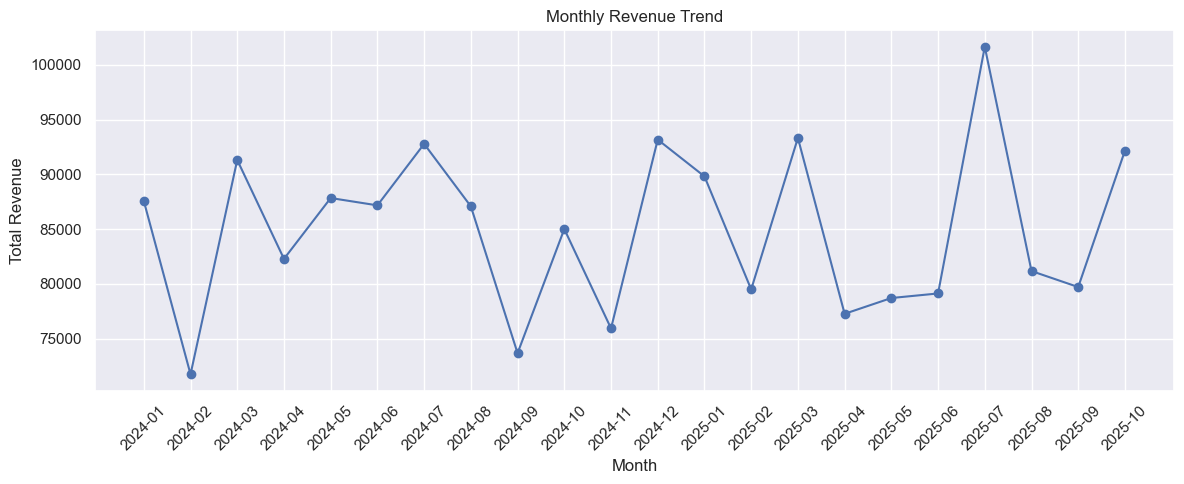

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(monthly_revenue['month'], monthly_revenue['total_revenue'], marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()


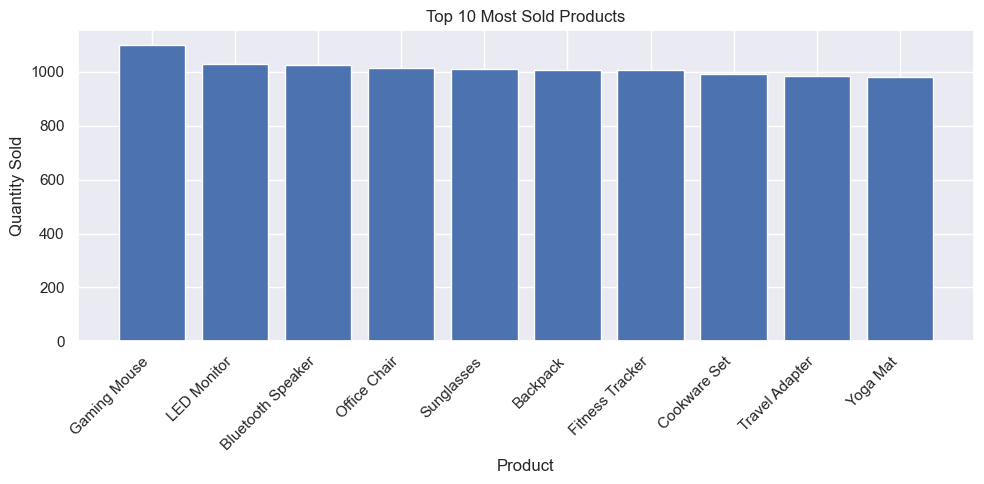

In [79]:
top10_products = most_sold_products.head(10)

plt.figure(figsize=(10,5))
plt.bar(top10_products['Product'], top10_products['total_quantity_sold'])
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Most Sold Products")
plt.xlabel("Product")
plt.ylabel("Quantity Sold")
plt.tight_layout()
plt.show()


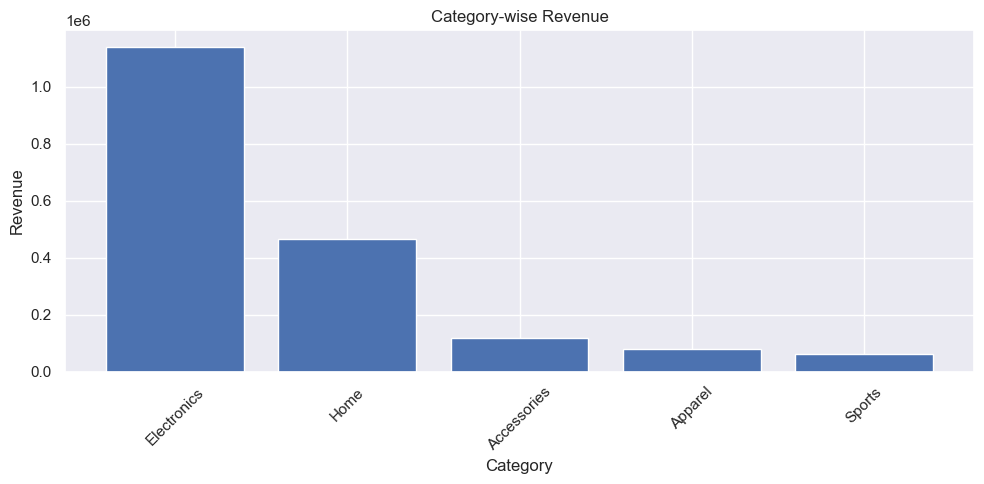

In [80]:
plt.figure(figsize=(10,5))
plt.bar(category_revenue['Category'], category_revenue['total_revenue'])
plt.xticks(rotation=45)
plt.title("Category-wise Revenue")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


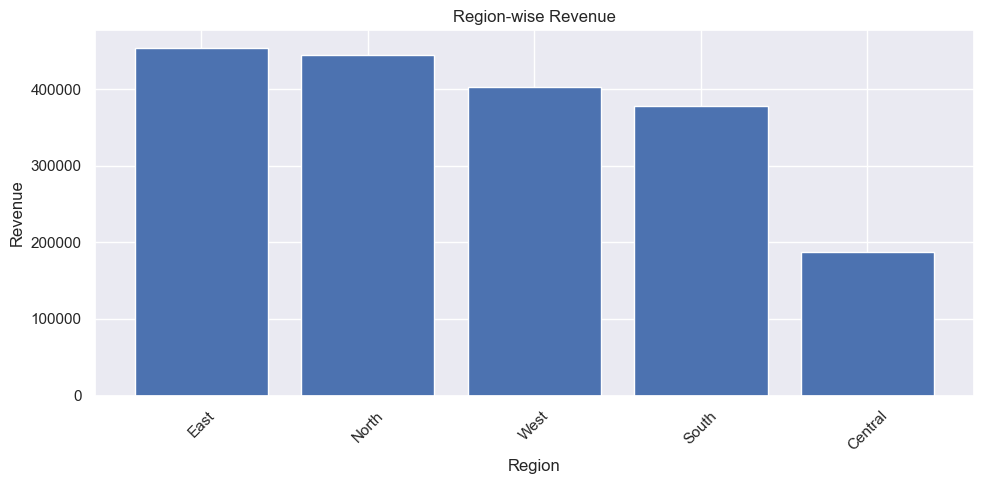

In [81]:
plt.figure(figsize=(10,5))
plt.bar(region_revenue['Region'], region_revenue['total_revenue'])
plt.xticks(rotation=45)
plt.title("Region-wise Revenue")
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


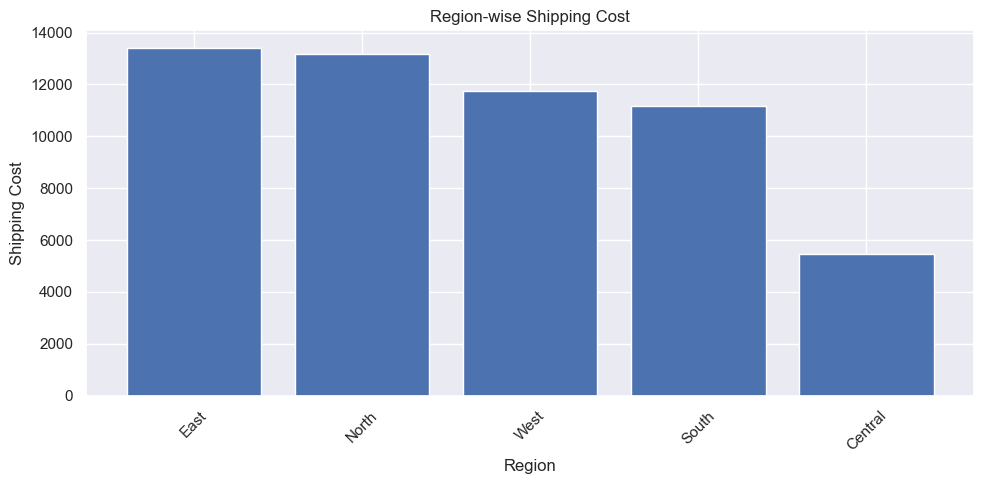

In [82]:
plt.figure(figsize=(10,5))
plt.bar(region_shipping_cost['Region'], region_shipping_cost['total_shipping_cost'])
plt.xticks(rotation=45)
plt.title("Region-wise Shipping Cost")
plt.xlabel("Region")
plt.ylabel("Shipping Cost")
plt.tight_layout()
plt.show()


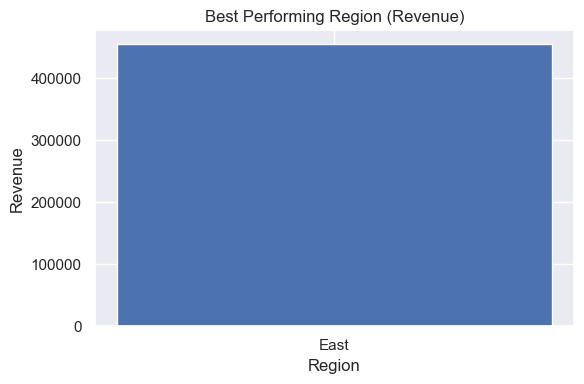

In [83]:
plt.figure(figsize=(6,4))
plt.bar(best_region['Region'], best_region['total_revenue'])
plt.title("Best Performing Region (Revenue)")
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


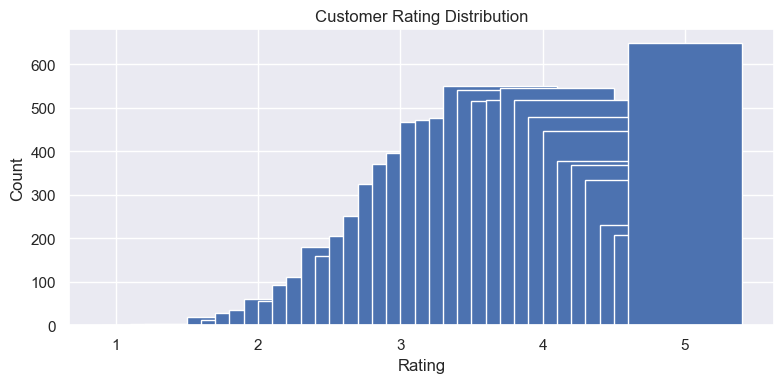

In [84]:
plt.figure(figsize=(8,4))
plt.bar(rating_dist['Customer_Rating'], rating_dist['rating_count'])
plt.title("Customer Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


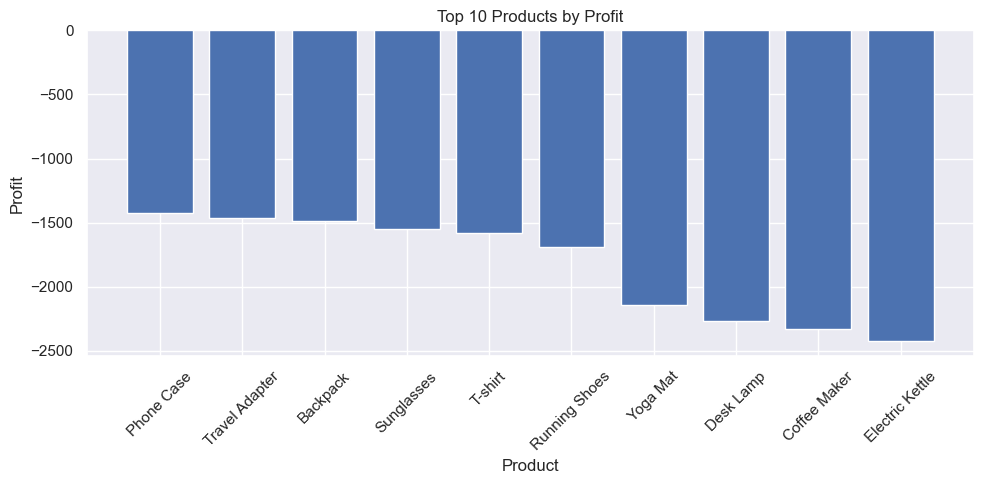

In [85]:
top_profit_products_10 = top_profit_products.head(10)

plt.figure(figsize=(10,5))
plt.bar(top_profit_products_10['Product'], top_profit_products_10['total_profit'])
plt.xticks(rotation=45)
plt.title("Top 10 Products by Profit")
plt.xlabel("Product")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()
